# 주가 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


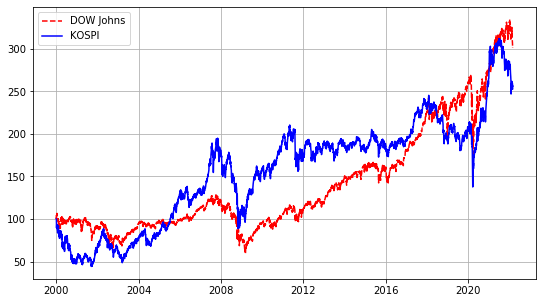

In [13]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

# yf.pdr_override()

# get index data
dow = pdr.get_data_yahoo('^DJI', '2000-01-01')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-01')

# draw chart
'''
plt.figure(figsize = (9,5))
plt.plot(dow.index, dow.Close, 'r--', label='DOW Johns')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')

plt.show()
'''

# 지수화 비교
# 특점 시점의 종가로 나누어 변동률 계산해보기

d = (dow.Close / dow.Close.loc['2000-01-04']) * 100 # 금일 다우존수 지수로 나눈 뒤 100 을 곱한다.
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

# draw chart
plt.figure(figsize = (9,5))
plt.plot(dow.index, d, 'r--', label='DOW Johns')
plt.plot(kospi.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')

plt.show()

# 산점도 분석  
### 산점도  
- 독립변수 x와 종속변수 y의 상관관계를 확인할 때 쓰는 그래프  
- 가로축 : 독립변수
- 세로축 : 종속변수 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


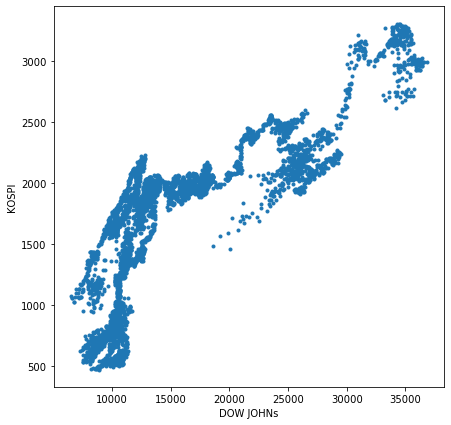

In [24]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW' : dow.Close,
                  'KOSPI' : kospi.Close})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# draw chart
plt.figure(figsize=(7,7))
plt.scatter(df.DOW, df.KOSPI, marker='.')
plt.xlabel('DOW JOHNs')
plt.ylabel('KOSPI')
plt.show()

# 사이파이 선형 회귀 분석  
파이썬 기반 수학, 과학, 엔지니어링용 핵심 패키지 모음  
넘파이 기반 함수들과, 수학적 알고리즘의 모음으로 넘파이, 맷플롯립, 심파이, 팬더스 등을 포함  
  
# 선형 회귀 분석  
Y와 Y의 원인이 되는 X 간의 관계를 추정하는 관계식을 의미  
실제 데이터 값에 측정 상의 한계로 인한 잡음 이 존재하기 때문에 정확한 관계식을 표현하는 확률 변수인 오차항을 두게 된다.  
  
 독립변수 X와 종속변수 Y의 관계가 다음처럼 1차식으로 나타날 때 선형 회귀 모델이라고 부른다.
  
Y =  β0 + β1Xi + εi(i = 1, 2, ...n)   
---  
Y : i 번재 종속변수 값  
Xi : i 번째 독립 변수의 값   
β0 : 선형 회귀식의 절편 (intercept)  
βi : 선형 회귀식의 기울기 (slope)  
εi : 오차항(종속변수 Y의 실제값과 기대치의 차이)

In [29]:
from scipy import stats 
regr = stats.linregress(df.DOW, df.KOSPI)
regr

LinregressResult(slope=0.07640756224703805, intercept=464.2188938392137, rvalue=0.8218617076135747, pvalue=0.0, stderr=0.0006989439500136796)

In [30]:
#상관 관계를 구하는 corr() 함수
df.corr()

,DOW,KOSPI
DOW,1.000000,0.821862
KOSPI,0.821862,1.000000


In [31]:
# 결정 계수 구하기
# 결정계수  = 상관계수 ** 2

r_value = df.corr()
r_squared = r_value ** 2


# DOW vs KOSPI 회귀 분석

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


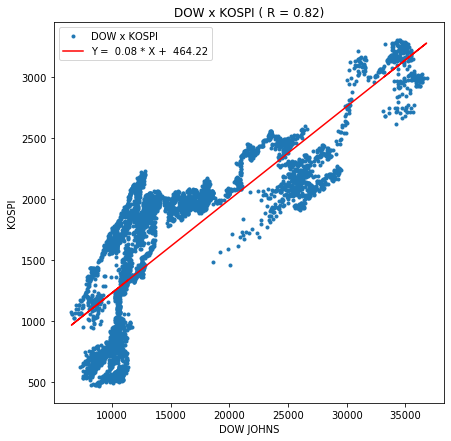

In [39]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({
    'X' : dow.Close,
    'Y' : kospi.Close
})

df = df.fillna(method= 'bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_lines = f'Y = {regr.slope : .2f} * X + {regr.intercept : .2f}' # 범례에 회귀식을 표시하는 레이블 문자

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_lines])
plt.title(f'DOW x KOSPI ( R = {regr.rvalue:.2f})')
plt.xlabel('DOW JOHNS')
plt.ylabel('KOSPI')
plt.show()

# TLT vs kospi


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


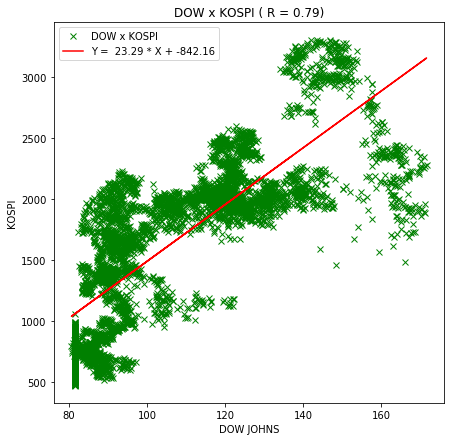

In [44]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

dow = pdr.get_data_yahoo('TLT', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({
    'X' : dow.Close,
    'Y' : kospi.Close
})

df = df.fillna(method= 'bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_lines = f'Y = {regr.slope : .2f} * X + {regr.intercept : .2f}' # 범례에 회귀식을 표시하는 레이블 문자

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, 'x', c='g')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_lines])
plt.title(f'DOW x KOSPI ( R = {regr.rvalue:.2f})')
plt.xlabel('DOW JOHNS')
plt.ylabel('KOSPI')
plt.show()

# make module

In [52]:
def compare_stocks(ticker1, ticker2):
    try :
        import pandas as pd
        from pandas_datareader import data as pdr
        import matplotlib.pyplot as plt
        import yfinance as yf
        from scipy import stats

        x_ticker = pdr.get_data_yahoo(ticker1, '2000-01-04')
        y_ticker = pdr.get_data_yahoo(ticker2, '2000-01-04')

        df = pd.DataFrame({
            'X' : x_ticker.Close,
            'Y' : y_ticker.Close
        })

        df = df.fillna(method= 'bfill')
        df = df.fillna(method='ffill')

        regr = stats.linregress(df.X, df.Y)
        regr_lines = f'Y = {regr.slope : .2f} * X + {regr.intercept : .2f}' # 범례에 회귀식을 표시하는 레이블 문자

        plt.figure(figsize=(7,7))
        plt.plot(df.X, df.Y, '.')
        plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
        plt.legend([ ticker1 + ' x ' + ticker2, regr_lines])
        plt.title(ticker1 + ' x ' + ticker2 + f'( R = {regr.rvalue:.2f})')
        plt.xlabel(ticker1)
        plt.ylabel(ticker2)
        plt.show()
    except :
        return 'un excepted error'